### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,w_material_early,...,w_castled_early,b_castled_early,w_checks_early,b_checks_early,early_checks,w_piece_activity,b_piece_activity,both_castled_early,total_captures_early,activity_diff
0,2504,2371,2,0,133,2437.5,1,133,0,34.0,...,1.0,1.0,0.0,0.0,0.0,41.0,39.0,1,6.0,2.0
1,2487,2596,1,0,109,2541.5,0,-109,0,20.0,...,1.0,1.0,1.0,1.0,2.0,33.0,31.0,1,13.0,2.0
2,2915,2921,1,0,6,2918.0,0,-6,0,32.0,...,1.0,1.0,0.0,0.0,0.0,31.0,37.0,1,6.0,-6.0
3,2542,2433,2,0,109,2487.5,1,109,10,26.0,...,1.0,0.0,1.0,0.0,1.0,34.0,28.0,0,7.0,6.0
4,2473,2658,0,0,185,2565.5,0,-185,0,28.0,...,1.0,1.0,3.0,0.0,3.0,30.0,35.0,1,9.0,-5.0


### 2. Prepare data

In [3]:
X = df.drop(['ResultNumeric'], axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (3031382, 33)
Target: (3031382,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

### 4. Train model

In [5]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1,                # Use all CPU cores
)

In [6]:
start_time = time.time()

rf_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 227.39 seconds (3.79 minutes)


### 5. Evaluate

In [7]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.5989 (59.89%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.57      0.61      0.59    249346
        Draw       0.88      0.28      0.42     81759
   White Win       0.60      0.68      0.64    275172

    accuracy                           0.60    606277
   macro avg       0.68      0.52      0.55    606277
weighted avg       0.63      0.60      0.59    606277



### 6. Confusion Matrix

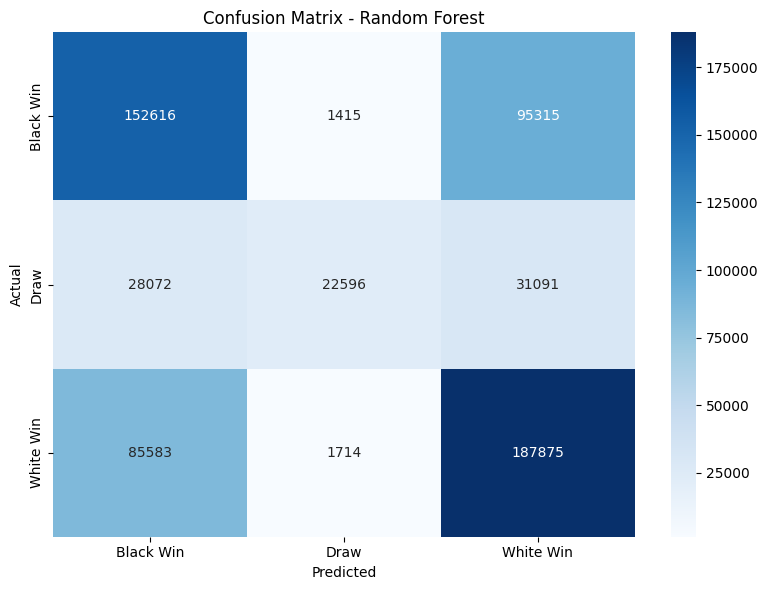

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

### 7. Feature Importance

                  Feature  Importance
6    WhiteRatingAdvantage    0.152661
4               AvgRating    0.128332
1                BlackElo    0.117214
0                WhiteElo    0.113740
3              RatingDiff    0.069241
5      WhiteIsHigherRated    0.067437
10    material_diff_early    0.046571
32          activity_diff    0.040208
29       b_piece_activity    0.023505
28       w_piece_activity    0.022850
8        w_material_early    0.018527
9        b_material_early    0.018369
2             EventTypeID    0.017257
13     capture_diff_early    0.015770
16  aggression_diff_early    0.015571
7                   ECOID    0.013745
19            center_diff    0.009977
22       development_diff    0.009336
15     b_aggression_early    0.009127
31   total_captures_early    0.008774
14     w_aggression_early    0.008491
21          b_development    0.007610
18       b_center_control    0.007474
17       w_center_control    0.007389
20          w_development    0.007071
27          

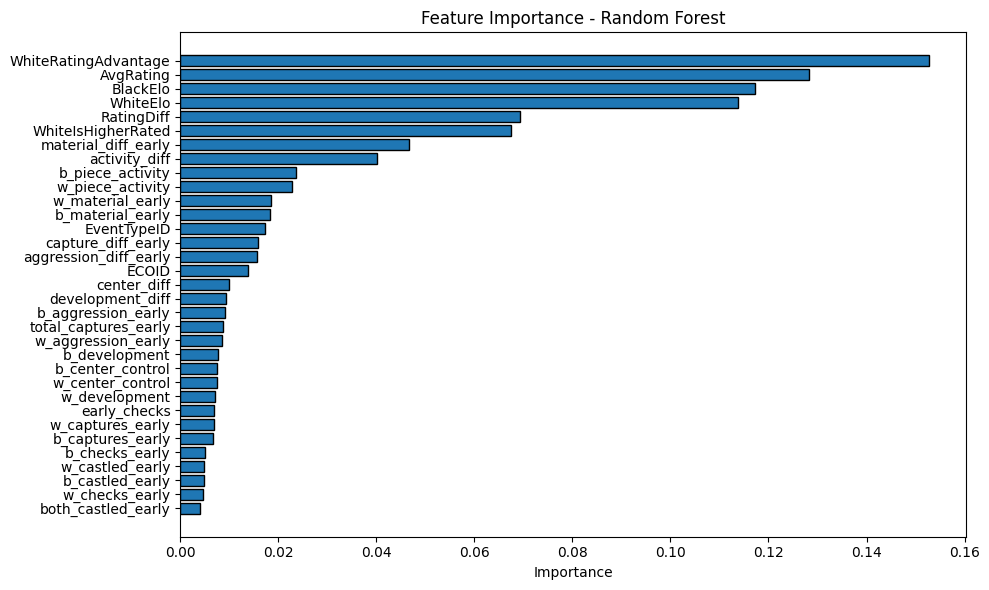

In [9]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], edgecolor="black")
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()